In [3]:
import pandas as pd
import seaborn as sns

In [4]:
titanic2=pd.read_csv('titanic_v2.csv', sep=';')

titanic2

,pclass,sex,age,survived
0,1,female,29.0000,1
1,1,male,0.9167,1
2,1,female,2.0000,0
3,1,male,30.0000,0
4,1,female,25.0000,0
...,...,...,...,...
1304,3,female,14.5000,0
1305,3,female,NaN,0
1306,3,male,26.5000,0
1307,3,male,27.0000,0


In [5]:
titanic2.drop_duplicates(inplace=True) # poista duplikaatit

colnamees= titanic2.columns
colnamees

Index(['pclass', 'sex', 'age', 'survived'], dtype='object')

In [6]:
# muutetaan sukupuoli numeraaliseksi muuttujaksi
titanic2['sex'].replace(['male' , 'female'], [1,2], inplace=True)
titanic2.head()

#selittävät muuttujat
X = titanic2.loc[:, 'pclass':'age'] # riveiltä kaikki, sarakkeista pclass:age

#vastemuuttuja
Y = titanic2.loc[:, 'survived'] # riveiltä kaikki, sarakkeista survived


U:\Users\jk026110\AppData\Local\Temp\ipykernel_10948\2644854042.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic2['sex'].replace(['male' , 'female'], [1,2], inplace=True)
U:\Users\jk026110\AppData\Local\Temp\ipykernel_10948\2644854042.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ti

In [7]:
#mallinnus
from sklearn import tree


In [8]:
# mitä arvoja sukupuoli muuttujassa on
titanic2['sex'].unique()

array([2, 1])

In [9]:
colnames = titanic2.columns
colnames

Index(['pclass', 'sex', 'age', 'survived'], dtype='object')

In [10]:


#titanic2['sex'] = titanic2['sex'].astype(int)

In [11]:
classifier = tree.DecisionTreeClassifier(max_depth=3) #määritellään malli
classifier.fit(X, Y) #opetus

DecisionTreeClassifier(max_depth=3)

In [12]:
import graphviz # https://graphviz.org/download/ lataa .zip ja pura samaan hakemistoon tämän tiedoston kanssa
import os
from pathlib import Path

os.environ["PATH"] += os.pathsep + str(Path('.').resolve() / Path('Graphviz-12.1.2-win64/bin/') )

visualisointi=tree.export_graphviz(classifier, 
                                   out_file=None,
                                   feature_names=colnames[:3],
                                   #class_names=classifier.classes_,
                                   class_names=['not survived', 'survived'],
                                   filled=True,
                                   node_ids=True,
                                   rounded=True,
                                   special_characters=True,
                                   impurity=False)  # piilota gini

graph = graphviz.Source(visualisointi)
graph

ModuleNotFoundError: No module named 'graphviz'

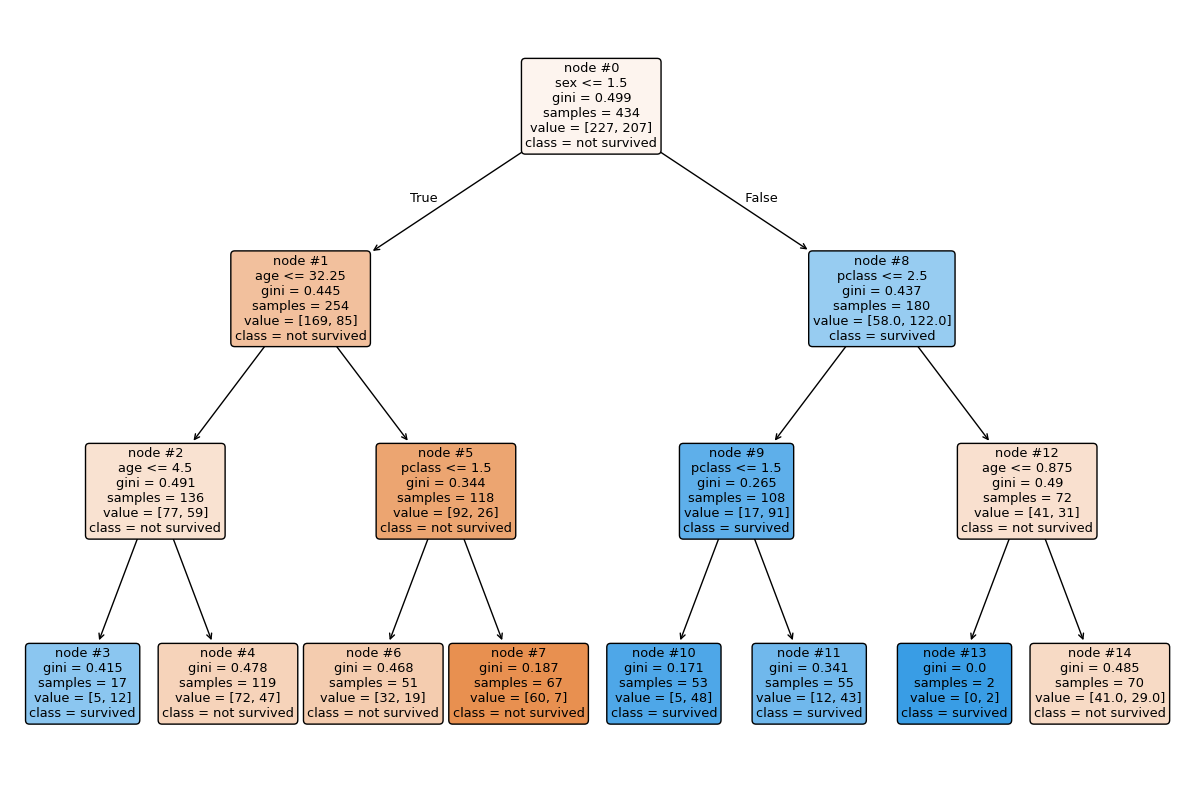

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
tree.plot_tree(classifier,
               node_ids=True, 
               class_names=['not survived', 'survived'], 
               feature_names=colnames[:3], 
               filled=True, 
               rounded=True
               ) 
plt.show()